<a href="https://colab.research.google.com/github/adam2504/adam2504/blob/main/CNN_PommePoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

POUR SUPPRIMER (CLEAR) LES FICHIERS PRESENTS DANS L'ENVIRONNEMENT COLAB

In [51]:
import os
import glob

# Liste tous les fichiers dans /content (pas les sous-dossiers)
files = glob.glob('/content/*')

for f in files:
    try:
        if os.path.isfile(f):
            os.remove(f)  # Supprime le fichier
        elif os.path.isdir(f):
            # Si c'est un dossier, on le supprime aussi (optionnel)
            import shutil
            shutil.rmtree(f)
    except Exception as e:
        print(f"Erreur en supprimant {f} : {e}")

print("Tous les fichiers et dossiers dans /content ont été supprimés.")


Tous les fichiers et dossiers dans /content ont été supprimés.


In [10]:
# Import dataset
import pathlib
import os
import zipfile
import tensorflow as tf

# Télécharger les datasets
pear_data_dir = tf.keras.utils.get_file(
    "pear.zip",
    "https://github.com/Else-If-05/Pomme_ou_Poire/raw/main/datasets/pear.zip",
    extract=False
)

apple_data_dir = tf.keras.utils.get_file(
    "apple.zip",
    "https://github.com/Else-If-05/Pomme_ou_Poire/raw/main/datasets/apple.zip",
    extract=False
)

# Créer le dossier datasets s'il n'existe pas
os.makedirs('/content/datasets', exist_ok=True)

# Dézipper les datasets dans le dossier /content/datasets
with zipfile.ZipFile(pear_data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
with zipfile.ZipFile(apple_data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

# Pointer vers le bon répertoire (à ajuster si le zip crée des sous-dossiers)
data_dir = pathlib.Path('/content/datasets')
print(data_dir)
print(os.path.abspath(data_dir))


5485097/5485097 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
/content/datasets
/content/datasets


In [14]:
import pathlib

data_dir = pathlib.Path('/content/datasets')
image_extensions = ['*.jpg', '*.jpeg', '*.png']

# Compter le nombre total d'images
image_count = 0
for ext in image_extensions:
    image_count += len(list(data_dir.rglob(ext)))

print(f"Nombre total d'images : {image_count}")

# Compter les images de poires
pear_data_dir = pathlib.Path('/content/datasets/pear')
pear_image_count = 0
for ext in image_extensions:
    pear_image_count += len(list(pear_data_dir.rglob(ext)))

print(f"Nombre total d'images de poires : {pear_image_count}")

# Compter les images de pommes
apple_data_dir = pathlib.Path('/content/datasets/Apple')
apple_image_count = 0
for ext in image_extensions:
    apple_image_count += len(list(apple_data_dir.rglob(ext)))

print(f"Nombre total d'images de pommes : {apple_image_count}")


Nombre total d'images : 5951
Nombre total d'images de poires : 5252
Nombre total d'images de pommes : 699


In [15]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 5951 files belonging to 2 classes.
Using 4761 files for training.
Found 5951 files belonging to 2 classes.
Using 1190 files for validation.
['Apple', 'pear']


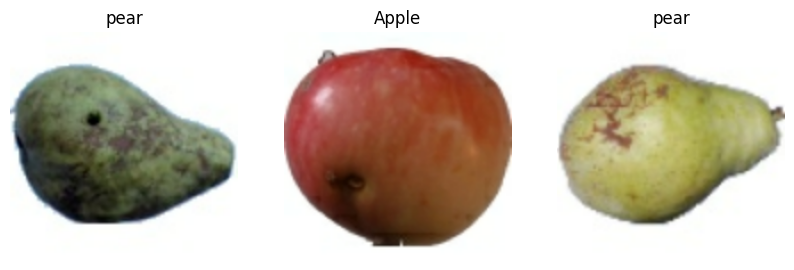

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [42]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=logdir,
    histogram_freq=1,
    write_images=True
)


model.fit(
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1587/1587 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9460 - loss: 0.1839 - val_accuracy: 0.9966 - val_loss: 0.0202
Epoch 2/2
1587/1587 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9963 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss: 1.5700e-05


In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 197, 197, 128)       │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 95, 95, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 44, 44, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 19, 19, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          83,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 784,664 (2.99 MB)

 Trainable params: 261,554 (1021.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 523,110 (2.00 MB)

Saving poire.png to poire.png


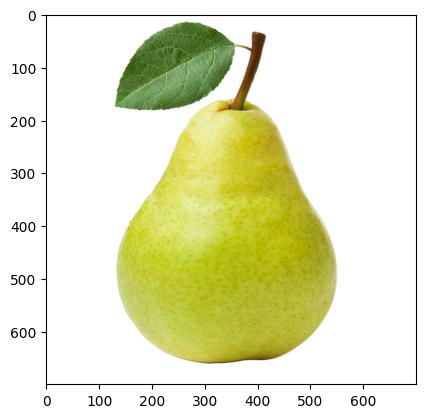

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction class: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction probabilities: [[1.8985045e-32 1.0000000e+00]]
IT'S AN APPLE !


In [50]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    # Prédiction
    res = np.argmax(model.predict(img_to_predict), axis=-1)
    print("Prediction class:", res)
    print("Prediction probabilities:", model.predict(img_to_predict))
    if res == 1:
        plt.show()
        print("IT'S AN APPLE !")
    elif res == 0 :
        plt.show()
        print("IT'S A PEAR !")